In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [117]:
data= pd.read_csv("C:\\Users\\Windows 11\\Desktop\\SuperStoreUS.csv")

In [ ]:
data.head(2)

In [116]:
data.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order year
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,2015
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,2015


In [115]:
data.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Order year              0
dtype: int64

In [74]:
#filling empty sets with mean
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(),inplace=True)

# StateWIse Sales


In [132]:
data['State or Province'].value_counts()

State or Province
California              214
New York                129
Texas                   124
Florida                 123
Illinois                 88
Ohio                     81
Michigan                 66
Washington               61
Indiana                  53
Pennsylvania             52
Minnesota                51
Virginia                 51
North Carolina           49
Massachusetts            46
Colorado                 44
Georgia                  44
Tennessee                41
Wisconsin                39
Utah                     38
Iowa                     38
Maryland                 34
New Jersey               32
Arizona                  31
South Carolina           30
Oregon                   28
Missouri                 27
Maine                    27
Kansas                   27
Alabama                  22
Kentucky                 22
Arkansas                 22
Louisiana                20
Connecticut              20
Idaho                    20
Nebraska                 18
Ok

In [133]:
#top 5 states sales
data['State or Province'].value_counts()[:5]

State or Province
California    214
New York      129
Texas         124
Florida       123
Illinois       88
Name: count, dtype: int64

# Product wise Profit

<function matplotlib.pyplot.show(close=None, block=None)>

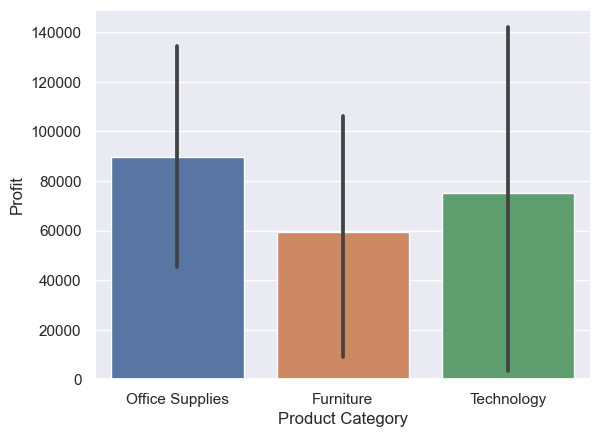

In [131]:
sns.barplot(x='Product Category', y='Profit', data=data,estimator='sum')
plt.show

# Order Date Sales

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [124]:
#changing orderdate format from object to datetime
data['Order Date']=pd.to_datetime(data['Order Date'],format='%d/%m/%Y')

In [125]:
#changing ship date format from object to datetime
data['Ship Date']=pd.to_datetime(data['Ship Date'],format='%d/%m/%Y')

In [126]:
#creating orderyear coloumn from the orderdate by extracting the year
data['Order year']=data['Order Date'].dt.year

In [113]:
data.shape

(1952, 26)

In [130]:
data['Order year'].value_counts()
#as it was only data of 2015

Order year
2015    1952
Name: count, dtype: int64

# Product Category

<function matplotlib.pyplot.show(close=None, block=None)>

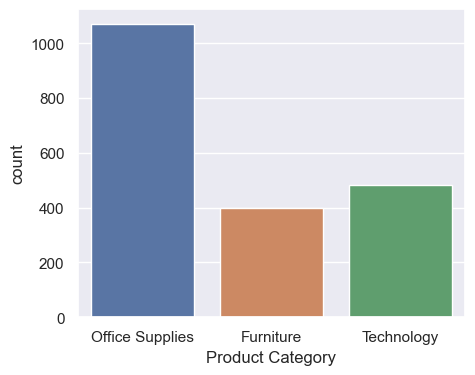

In [75]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category", data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

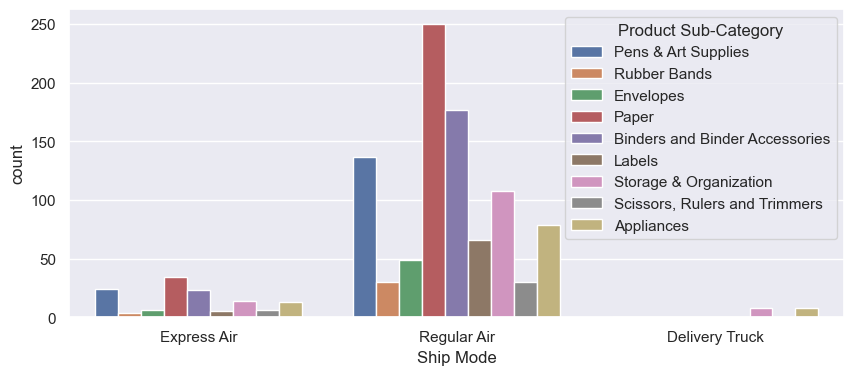

In [79]:
plt.figure(figsize=(,4))
sns.countplot(x="Ship Mode", data=data[data['Product Category']=='Office Supplies'], hue='Product Sub-Category')
plt.show

# Customer Segment

<function matplotlib.pyplot.show(close=None, block=None)>

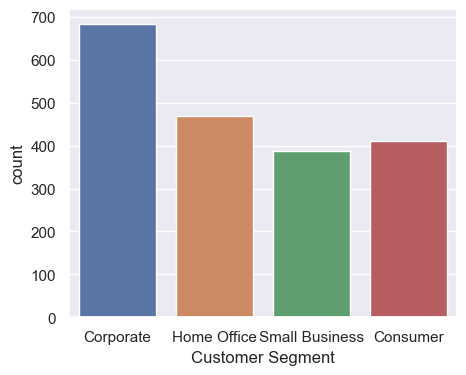

In [73]:
plt.figure(figsize=(5,4))
sns.countplot(x="Customer Segment", data=data)
plt.show

# Ship Mode

In [52]:
data['Ship Mode'].value_counts()

Ship Mode
Regular Air       1437
Delivery Truck     275
Express Air        240
Name: count, dtype: int64

In [54]:
x=data['Ship Mode'].value_counts().index
y=data['Ship Mode'].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

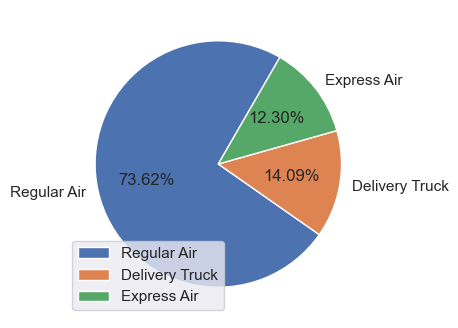

In [68]:
plt.figure(figsize=(5,4))
plt.pie(y, labels=x, startangle=60, autopct="%.2f%%")
plt.legend(loc=3)
plt.show

# Product Category and ShipMode

<function matplotlib.pyplot.show(close=None, block=None)>

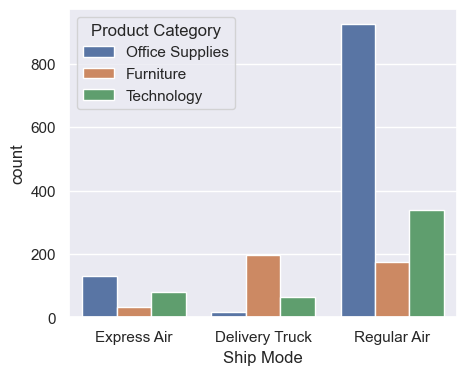

In [72]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode", data=data, hue='Product Category')
plt.show

# Order Priority

In [37]:
data['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: count, dtype: int64

In [38]:
data['Order Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

In [40]:
data['Order Priority']=data['Order Priority'].replace("Critical ","Critical")

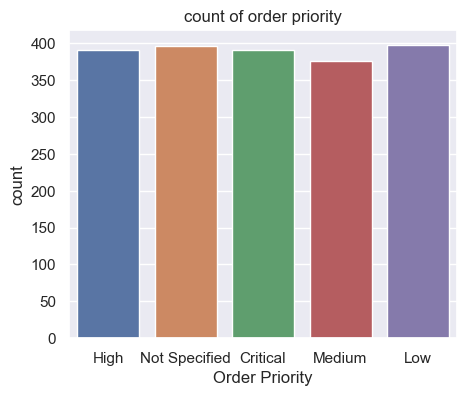

In [50]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority", data=data)
plt.title("count of order priority")
plt.savefig("count of order priority.jpg")
plt.show()